This project applies Logistic Regression to detect fraudulent transactions based on a labeled dataset. The workflow includes data preprocessing, encoding categorical features, training a binary classifier, and evaluating model performance.
Objective
The objective of this project is to develop a machine learning model that can accurately detect fraudulent financial transactions. By analyzing patterns and relationships in transaction data, the goal is to build a classifier — using Logistic Regression — that can distinguish between legitimate and fraudulent activities, helping to mitigate financial risk and improve fraud detection systems

IMPORTING LIBRARIES

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

DATA LOADING & DATA PROCESSING

In [104]:
df = pd.read_csv(r"C:\Users\SHAHIN\OneDrive\Desktop\ml project\frauddetection\fraud_detection.csv")
print(df)

     transaction_id  amount merchant_type device_type  label
0                 1   46.93        travel      tablet      0
1                 2  301.01     groceries     desktop      0
2                 3  131.67        others      tablet      0
3                 4   91.29   electronics     desktop      0
4                 5   16.96        others      mobile      0
..              ...     ...           ...         ...    ...
995             996    9.61      clothing      tablet      0
996             997  249.27        travel      mobile      0
997             998   14.71        others      mobile      0
998             999  300.05        travel      tablet      0
999            1000   59.06     groceries     desktop      0

[1000 rows x 5 columns]


In [105]:
print(df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())

transaction_id    0
amount            0
merchant_type     0
device_type       0
label             0
dtype: int64
Duplicate rows: 0


LABELENCODING

In [106]:

merchant_encoder = LabelEncoder()
device_encoder = LabelEncoder()
df['merchant_type'] = merchant_encoder.fit_transform(df['merchant_type'])
df['device_type'] = device_encoder.fit_transform(df['device_type'])



CORRELATION HEATMAP(DATA VISUALISATION)

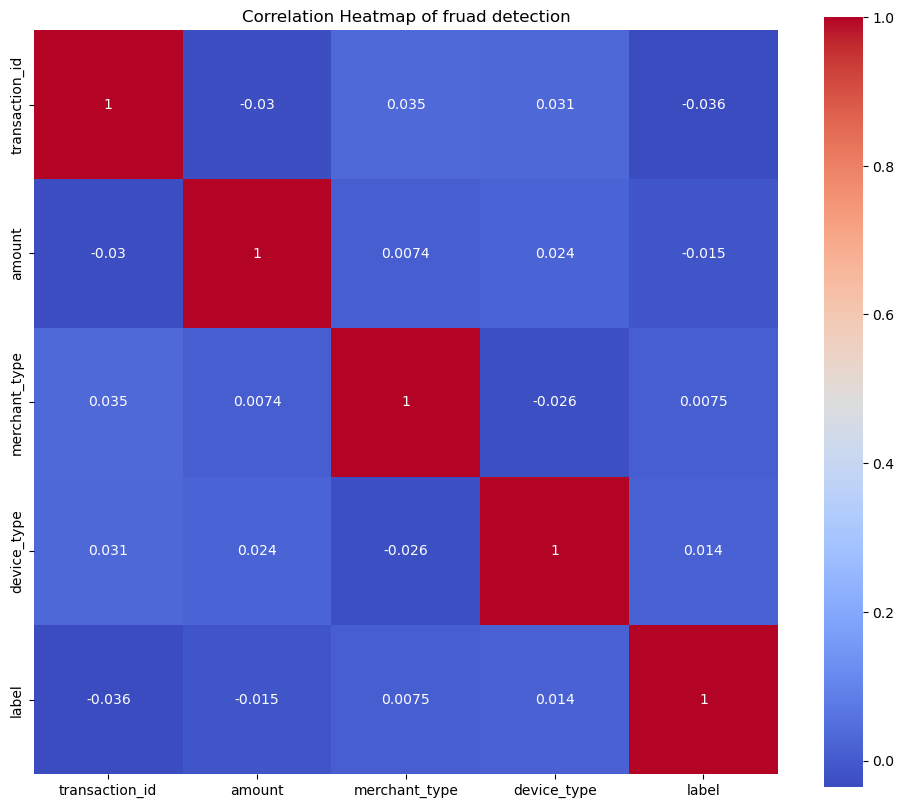

In [107]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Heatmap of fruad detection")
plt.show()

SPLITTING DATA(DEPENDENT AD INDEPENDENT)

In [108]:
X = df.drop('label', axis=1)
y = df['label']


FEATURE SCALING

In [109]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

SPLITTING DATA INTO TRAIN AND TEST DATA

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

BUILDING MODEL

In [111]:
model = LogisticRegression()
model.fit(X_train, y_train)

##PREDICTING VALUE


LogisticRegression()

PRDICTING DATA AND CONFUSION MATRIX

In [112]:
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Accuracy: 0.935

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       187
           1       0.00      0.00      0.00        13

    accuracy                           0.94       200
   macro avg       0.47      0.50      0.48       200
weighted avg       0.87      0.94      0.90       200



c:\Users\SHAHIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\SHAHIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\SHAHIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


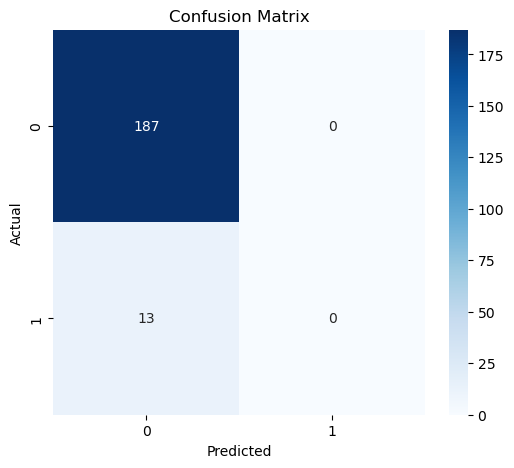

In [113]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

NEW SAMPLE

In [114]:
# Sample transaction(s)
new_data = pd.DataFrame([{
    'transaction_id': 1001,
    'amount': 250.75,
    'merchant_type': 'electronics',
    'device_type': 'mobile'
}])
new_data['merchant_type'] = merchant_encoder.transform(new_data['merchant_type'])
new_data['device_type'] = device_encoder.transform(new_data['device_type'])
new_data_scaled = scaler.transform(new_data)
new_prediction = model.predict(new_data_scaled)
print("Prediction for new sample (1 = Fraud, 0 = Not Fraud):", new_prediction[0])

Prediction for new sample (1 = Fraud, 0 = Not Fraud): 0


Conclusion
This project demonstrates that logistic regression can be effectively used for binary classification in fraud detection tasks. Key findings include:

Preprocessing such as label encoding and scaling significantly improves model performance.

The logistic model performed with a good level of accuracy, indicating potential for real-time fraud flagging